In [1]:
import pandas as pd
import numpy as np
import warnings
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.preprocessing import StandardScaler

import scipy.stats as stats

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

# Classification Model for Turnover prediction

This project will attemp to predict if an employee will leave the company

# Data Reading

In [2]:
data = pd.read_csv('HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
data = data.set_index("EmpID")


In [4]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Exploring Data

In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 10026 to 10271
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   MarriedID                   311 non-null    int64  
 2   MaritalStatusID             311 non-null    int64  
 3   GenderID                    311 non-null    int64  
 4   EmpStatusID                 311 non-null    int64  
 5   DeptID                      311 non-null    int64  
 6   PerfScoreID                 311 non-null    int64  
 7   FromDiversityJobFairID      311 non-null    int64  
 8   Salary                      311 non-null    int64  
 9   Termd                       311 non-null    int64  
 10  PositionID                  311 non-null    int64  
 11  Position                    311 non-null    object 
 12  State                       311 non-null    object 
 13  Zip                         3

In [6]:
data.State.unique()


array(['MA', 'TX', 'CT', 'VA', 'VT', 'AL', 'WA', 'CA', 'OH', 'IN', 'TN',
       'NH', 'RI', 'PA', 'CO', 'NY', 'UT', 'GA', 'FL', 'NC', 'KY', 'ID',
       'NV', 'MT', 'OR', 'ND', 'AZ', 'ME'], dtype=object)

In [7]:
data.State.value_counts()


MA    276
CT      6
TX      3
VT      2
UT      1
AZ      1
ND      1
OR      1
MT      1
NV      1
ID      1
KY      1
NC      1
FL      1
GA      1
CO      1
NY      1
PA      1
RI      1
NH      1
TN      1
IN      1
OH      1
CA      1
WA      1
AL      1
VA      1
ME      1
Name: State, dtype: int64

In [8]:
#company seems to be based in Massachusetts


In [9]:
data.Sex.unique()


array(['M ', 'F'], dtype=object)

In [10]:
data.DateofHire.unique().max()


'9/6/2016'

In [11]:
data.DateofHire.unique().min()


'1/10/2011'

In [12]:
data.EmploymentStatus.unique()


array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [13]:
data.TermReason.unique()


array(['N/A-StillEmployed', 'career change', 'hours', 'return to school',
       'Another position', 'unhappy', 'attendance', 'performance',
       'Learned that he is a gangster', 'retiring',
       'relocation out of area', 'more money', 'military',
       'no-call, no-show', 'Fatal attraction',
       'maternity leave - did not return', 'medical issues',
       'gross misconduct'], dtype=object)

In [14]:
data.PerformanceScore.unique()


array(['Exceeds', 'Fully Meets', 'Needs Improvement', 'PIP'], dtype=object)

In [15]:
data.LastPerformanceReview_Date.unique()


array(['1/17/2019', '2/24/2016', '5/15/2012', '1/3/2019', '2/1/2016',
       '1/7/2019', '1/2/2019', '2/25/2019', '1/25/2019', '2/18/2019',
       '1/30/2016', '5/6/2016', '2/14/2019', '3/2/2017', '4/5/2017',
       '1/14/2019', '1/15/2015', '1/11/2019', '1/10/2019', '2/27/2019',
       '3/4/2014', '1/10/2016', '2/20/2014', '3/4/2013', '1/15/2019',
       '2/1/2019', '1/21/2019', '2/10/2013', '2/21/2019', '2/22/2019',
       '1/30/2019', '2/12/2019', '2/19/2019', '1/19/2019', '3/10/2015',
       '5/3/2012', '5/4/2011', '2/28/2019', '5/1/2016', '2/4/2019',
       '1/22/2019', '1/28/2019', '1/24/2019', '1/31/2019', '4/2/2016',
       '5/6/2015', '1/23/2019', '1/29/2019', '1/18/2019', '1/4/2019',
       '1/27/2019', '4/9/2017', '2/13/2019', '4/12/2018', '1/15/2017',
       '8/10/2012', '2/4/2016', '4/5/2013', '1/7/2012', '2/8/2019',
       '2/26/2019', '1/16/2019', '4/29/2016', '1/15/2014', '1/20/2015',
       '2/7/2019', '3/6/2011', '2/15/2019', '6/3/2013', '2/1/2013',
       '1/8/2019',

In [16]:
#dates are in american form, will need to change them

In [17]:
data.isna().sum()


Employee_Name                   0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceScore                0
EngagementSurv

In [18]:
#date of termination has 207 nans because these are the active employees

In [19]:
data.DateofTermination.unique()


array([nan, '6/16/2016', '9/24/2012', '9/6/2016', '1/12/2017',
       '9/19/2016', '4/6/2017', '8/4/2017', '9/12/2015', '4/4/2014',
       '2/19/2016', '8/7/2014', '6/15/2013', '8/2/2014', '11/15/2015',
       '1/7/2013', '9/26/2011', '9/23/2016', '6/8/2016', '11/4/2015',
       '6/6/2017', '9/27/2018', '2/25/2018', '6/5/2013', '5/17/2016',
       '6/24/2013', '1/9/2013', '8/19/2018', '11/15/2016', '9/5/2015',
       '6/25/2015', '3/15/2015', '5/30/2011', '1/11/2014', '10/31/2014',
       '12/15/2015', '6/18/2013', '4/7/2012', '4/15/2015', '4/1/2013',
       '4/29/2018', '4/1/2016', '4/24/2014', '6/4/2015', '1/9/2014',
       '12/12/2015', '3/31/2014', '4/15/2013', '9/26/2018', '9/15/2016',
       '11/14/2015', '9/26/2017', '8/19/2012', '11/11/2016', '9/4/2014',
       '5/25/2016', '5/1/2018', '8/19/2013', '1/12/2014', '9/7/2015',
       '5/1/2016', '12/28/2017', '9/15/2015', '10/25/2015', '2/4/2013',
       '5/18/2016', '11/30/2012', '6/4/2018', '8/15/2015', '4/7/2018',
       '1/15/2

In [20]:
data.describe()


,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [21]:
data_numerical = data.select_dtypes("number")
data_numerical

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,
10026,0,0,1,1,5,4,0,62506,0,19,1960,22.0,4.60,5,0,0,1
10084,1,1,1,5,3,3,0,104437,1,27,2148,4.0,4.96,3,6,0,17
10196,1,1,0,5,5,3,0,64955,1,20,1810,20.0,3.02,3,0,0,3
10088,1,1,0,1,5,3,0,64991,0,19,1886,16.0,4.84,5,0,0,15
10069,0,2,0,5,5,3,0,50825,1,19,2169,39.0,5.00,4,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,0,0,1,1,5,3,0,65893,0,20,1810,20.0,4.07,4,0,0,13
10301,0,0,0,5,5,1,0,48513,1,19,2458,12.0,3.20,2,0,5,4
10010,0,0,0,1,3,4,0,220450,0,6,2067,2.0,4.60,5,6,0,16


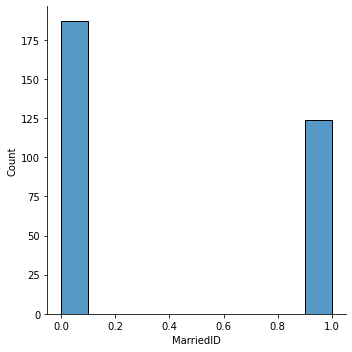

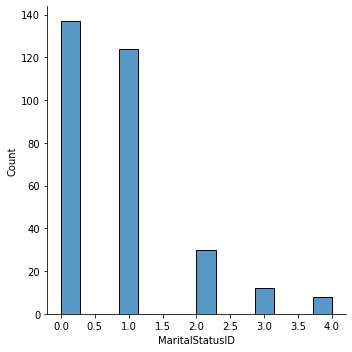

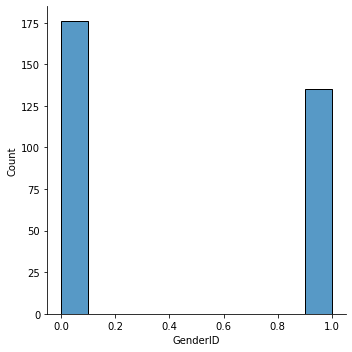

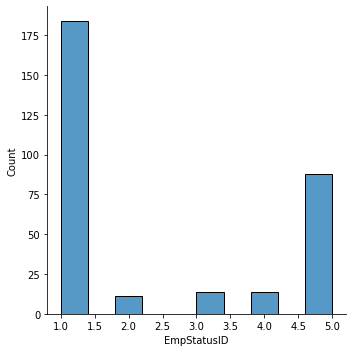

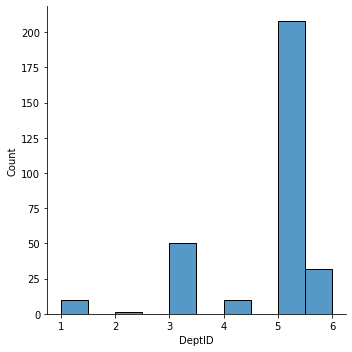

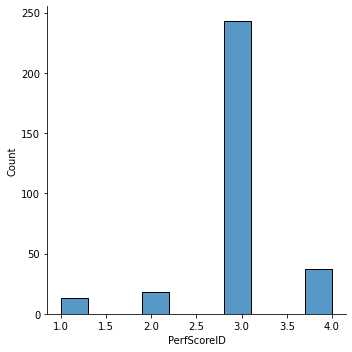

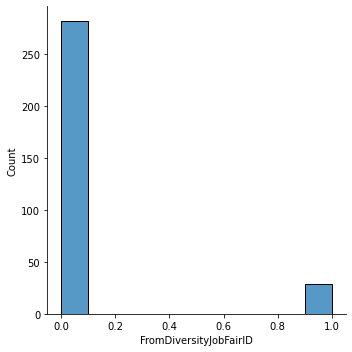

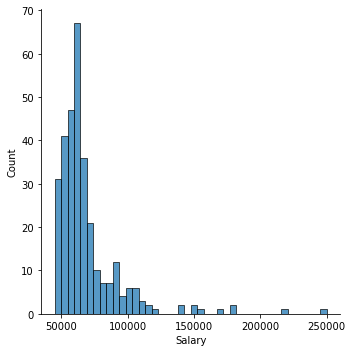

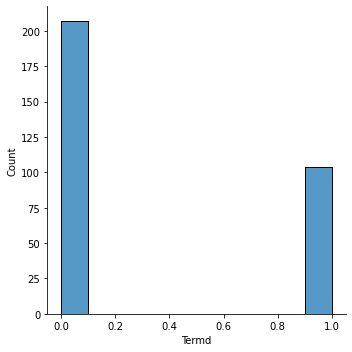

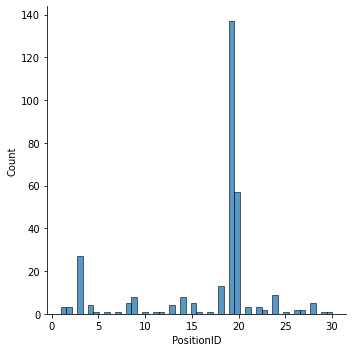

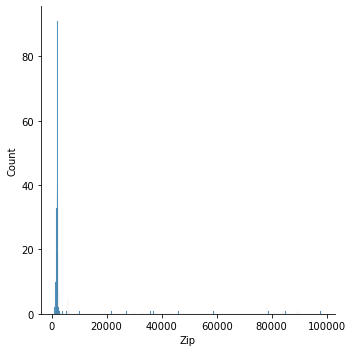

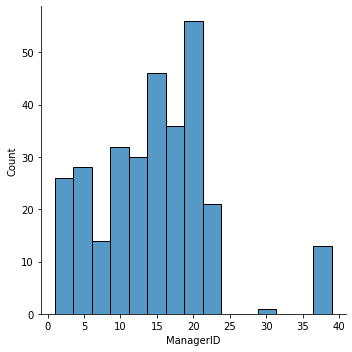

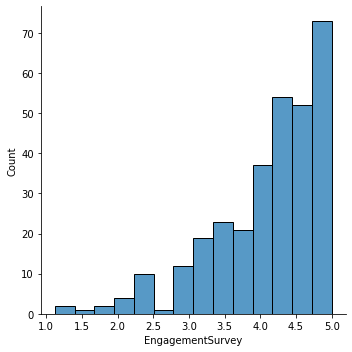

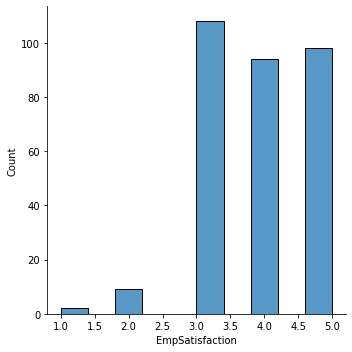

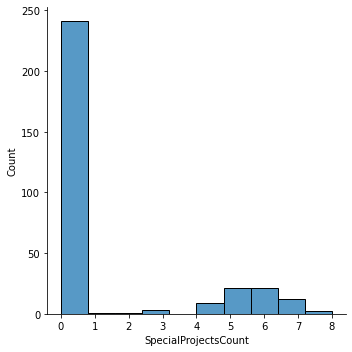

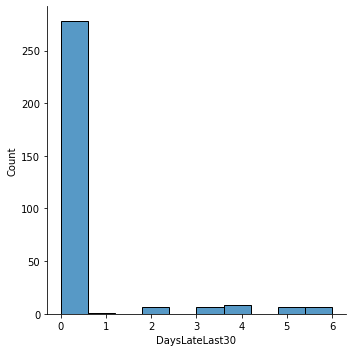

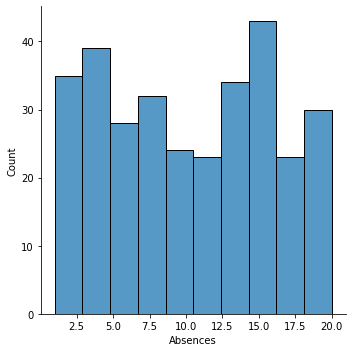

In [22]:
for column in data_numerical.columns:
    sns.displot(data_numerical[column])
plt.show()

#few things
lots of values are not really numericals but categoricals already dummified
my target would be TERMD,


In [23]:
#i also have to figure data stopped getting imputs probably 2019 so i cannot calculate time in job from today but from that date

In [24]:
#checking correlation

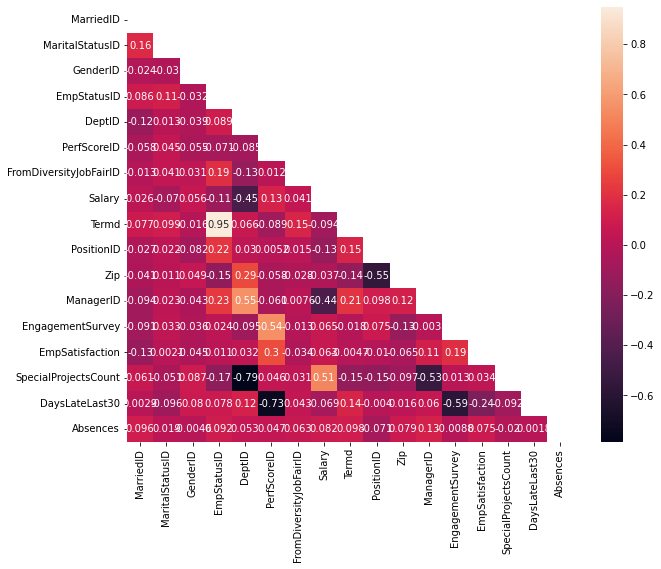

In [25]:
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)]=True
fig, ax = plt.subplots(figsize=(10,8))
ax =sns.heatmap(data.corr(), mask=mask, annot=True)
plt.show()

In [26]:
#checking categorical Variables

In [27]:
data_categorical = data.select_dtypes("object")
data_categorical

,Employee_Name,Position,State,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,LastPerformanceReview_Date
EmpID,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",Production Technician I,MA,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds,1/17/2019
10084,"Ait Sidi, Karthikeyan",Sr. DBA,MA,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,2/24/2016
10196,"Akinkuolie, Sarah",Production Technician II,MA,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,5/15/2012
10088,"Alagbe,Trina",Production Technician I,MA,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets,1/3/2019
10069,"Anderson, Carol",Production Technician I,MA,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,2/1/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",Production Technician II,MA,05/11/85,M,Single,US Citizen,No,White,7/7/2014,NaN,N/A-StillEmployed,Active,Production,Kissy Sullivan,LinkedIn,Fully Meets,2/28/2019
10301,"Ybarra, Catherine",Production Technician I,MA,05/04/82,F,Single,US Citizen,No,Asian,9/2/2008,9/29/2015,Another position,Voluntarily Terminated,Production,Brannon Miller,Google Search,PIP,9/2/2015
10010,"Zamora, Jennifer",CIO,MA,08/30/79,F,Single,US Citizen,No,White,4/10/2010,NaN,N/A-StillEmployed,Active,IT/IS,Janet King,Employee Referral,Exceeds,2/21/2019


what is PerfScoreID

In [28]:
data.PerfScoreID.unique()

array([4, 3, 2, 1])

In [29]:
#i'm guessing performance score is  given by manager

In [30]:
data.CitizenDesc.unique()


array(['US Citizen', 'Eligible NonCitizen', 'Non-Citizen'], dtype=object)

In [31]:
data.EmpStatusID.unique()


array([1, 5, 3, 4, 2])

In [32]:
data.Termd.unique()


array([0, 1])

In [33]:
data.DateofHire.unique()


array(['7/5/2011', '3/30/2015', '1/7/2008', '7/11/2011', '1/9/2012',
       '11/10/2014', '9/30/2013', '7/6/2009', '1/5/2015', '1/10/2011',
       '4/2/2012', '2/20/2012', '9/24/2012', '2/21/2011', '7/21/2016',
       '4/4/2011', '7/7/2014', '7/8/2013', '8/19/2013', '2/17/2014',
       '2/16/2015', '10/27/2008', '9/29/2014', '11/11/2013', '8/15/2011',
       '3/5/2012', '1/28/2016', '3/31/2014', '6/30/2016', '8/18/2014',
       '9/6/2016', '5/12/2014', '5/14/2012', '6/27/2011', '10/3/2011',
       '9/5/2012', '5/16/2011', '8/30/2010', '7/6/2016', '7/20/2010',
       '1/5/2009', '5/5/2014', '7/2/2012', '11/7/2011', '7/9/2018',
       '2/15/2017', '1/7/2013', '1/5/2014', '9/18/2014', '4/26/2010',
       '5/2/2011', '5/11/2015', '4/15/2011', '9/6/2011', '5/1/2010',
       '6/2/2015', '4/20/2017', '3/7/2012', '11/28/2011', '8/13/2012',
       '6/6/2016', '6/5/2015', '11/5/2012', '1/6/2014', '9/26/2011',
       '3/7/2011', '7/9/2012', '10/2/2016', '1/5/2016', '4/30/2012',
       '1/21/2011'

In [34]:
from datetime import datetime

In [35]:
objdate= pd.to_datetime(data['DateofHire'])

In [36]:
objdate

EmpID
10026   2011-07-05
10084   2015-03-30
10196   2011-07-05
10088   2008-01-07
10069   2011-07-11
           ...    
10135   2014-07-07
10301   2008-09-02
10010   2010-04-10
10043   2015-03-30
10271   2014-09-29
Name: DateofHire, Length: 311, dtype: datetime64[ns]

In [37]:
objdate.unique()

array(['2011-07-05T00:00:00.000000000', '2015-03-30T00:00:00.000000000',
       '2008-01-07T00:00:00.000000000', '2011-07-11T00:00:00.000000000',
       '2012-01-09T00:00:00.000000000', '2014-11-10T00:00:00.000000000',
       '2013-09-30T00:00:00.000000000', '2009-07-06T00:00:00.000000000',
       '2015-01-05T00:00:00.000000000', '2011-01-10T00:00:00.000000000',
       '2012-04-02T00:00:00.000000000', '2012-02-20T00:00:00.000000000',
       '2012-09-24T00:00:00.000000000', '2011-02-21T00:00:00.000000000',
       '2016-07-21T00:00:00.000000000', '2011-04-04T00:00:00.000000000',
       '2014-07-07T00:00:00.000000000', '2013-07-08T00:00:00.000000000',
       '2013-08-19T00:00:00.000000000', '2014-02-17T00:00:00.000000000',
       '2015-02-16T00:00:00.000000000', '2008-10-27T00:00:00.000000000',
       '2014-09-29T00:00:00.000000000', '2013-11-11T00:00:00.000000000',
       '2011-08-15T00:00:00.000000000', '2012-03-05T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2014-03-31

In [38]:
data['DateofHire']= objdate

In [39]:
data['DateofHire'].max()

Timestamp('2018-07-09 00:00:00')

# Feature SelectionData Type Conversion and Feature Selection


# Date convertions

Dates need to be properly converted to be able to make columns "age" and "tenure"
2 Logics were followed for both columns:
-For terminated employees Tenure and Age were calculated with Date of termination, this way we can use it for predictions of active employees.
-For Active employees the date of substraction for both tenure and age will be 2019, which is where the data stopped 

In [40]:
#First date convertions

In [41]:
DOBdate= pd.to_datetime(data['DOB'])
data['DOB']= DOBdate
DateofTerminationdate= pd.to_datetime(data['DateofTermination'])
data['DateofTermination']= DateofTerminationdate
LastPerformanceReview_Date= pd.to_datetime(data['LastPerformanceReview_Date'])
data['LastPerformanceReview_Date']= LastPerformanceReview_Date

In [42]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2


In [43]:
data.DateofTermination.unique().max()

numpy.datetime64('NaT')

In [44]:
data['EmploymentStatus'].unique()

array(['Active', 'Voluntarily Terminated', 'Terminated for Cause'],
      dtype=object)

In [45]:
#creating Column Age for inactive employees

In [46]:
data['age']= data['DateofTermination']-data['DOB']

In [47]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,NaT
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,15018 days
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,8771 days
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,NaT
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,9860 days


In [48]:
now = pd.Timestamp('now')

data['DOB'] = data['DOB'].where(data['DOB'] < now, data['DOB'] -  np.timedelta64(100, 'Y'))   # 2
data['age'] = (data['DateofTermination'] - data['DOB'])   # 3


In [49]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,NaT
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,15018 days
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,8771 days
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,NaT
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,9860 days


In [50]:
#now creating age for active employees

In [51]:
year=pd.Timestamp('2019')

In [52]:
year

Timestamp('2019-01-01 00:00:00')

In [53]:
data['age'] = data['age'].fillna(year - data['DOB'])

In [54]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,12959 days
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,15018 days
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,8771 days
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,11053 days
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,9860 days


In [55]:
data['age']

EmpID
10026   12959 days
10084   15018 days
10196    8771 days
10088   11053 days
10069    9860 days
           ...    
10135   12288 days
10301   12201 days
10010   14369 days
10043   14556 days
10271   14747 days
Name: age, Length: 311, dtype: timedelta64[ns]

In [56]:
#Finally converting age into years

In [57]:
data['age']=data['age'].astype('<m8[Y]') 

In [58]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,35.0
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,41.0
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,24.0
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,30.0
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,26.0


In [59]:
#now creating column Tenure for inactive  and active employees

In [60]:
#Inactive
data['tenure'] = (data['DateofTermination'] - data['DateofHire'])
#Active
data['tenure'] = data['tenure'].fillna(year - data['DateofHire'])

In [61]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age,tenure
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,35.0,2737 days
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,41.0,444 days
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,24.0,447 days
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,30.0,4012 days
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,26.0,1884 days


In [62]:
#Converting to year

In [63]:
data['tenure']=data['tenure'].astype('<m8[Y]') 

In [64]:
data.head()

,Employee_Name,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,age,tenure
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,2019-01-17,0,1,35.0,7.0
10084,"Ait Sidi, Karthikeyan",1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2016-02-24,0,17,41.0,1.0
10196,"Akinkuolie, Sarah",1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,2012-05-15,0,3,24.0,1.0
10088,"Alagbe,Trina",1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,2019-01-03,0,15,30.0,10.0
10069,"Anderson, Carol",0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2016-02-01,0,2,26.0,5.0


In [65]:
#for the class model i will delete both columns as they mean the same as TERMD (target)

In [66]:
EmpStatus= data[['EmpStatusID','EmploymentStatus']]
EmpStatus.head(20)


,EmpStatusID,EmploymentStatus
EmpID,,
10026,1,Active
10084,5,Voluntarily Terminated
10196,5,Voluntarily Terminated
10088,1,Active
10069,5,Voluntarily Terminated
10002,1,Active
10194,1,Active
10062,1,Active
10114,3,Active


In [67]:
#working on which categorical data to keep


In [68]:
data_categorical = data.select_dtypes("object")
data_categorical

,Employee_Name,Position,State,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,TermReason,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore
EmpID,,,,,,,,,,,,,,
10026,"Adinolfi, Wilson K",Production Technician I,MA,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Michael Albert,LinkedIn,Exceeds
10084,"Ait Sidi, Karthikeyan",Sr. DBA,MA,M,Married,US Citizen,No,White,career change,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets
10196,"Akinkuolie, Sarah",Production Technician II,MA,F,Married,US Citizen,No,White,hours,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets
10088,"Alagbe,Trina",Production Technician I,MA,F,Married,US Citizen,No,White,N/A-StillEmployed,Active,Production,Elijiah Gray,Indeed,Fully Meets
10069,"Anderson, Carol",Production Technician I,MA,F,Divorced,US Citizen,No,White,return to school,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,"Woodson, Jason",Production Technician II,MA,M,Single,US Citizen,No,White,N/A-StillEmployed,Active,Production,Kissy Sullivan,LinkedIn,Fully Meets
10301,"Ybarra, Catherine",Production Technician I,MA,F,Single,US Citizen,No,Asian,Another position,Voluntarily Terminated,Production,Brannon Miller,Google Search,PIP
10010,"Zamora, Jennifer",CIO,MA,F,Single,US Citizen,No,White,N/A-StillEmployed,Active,IT/IS,Janet King,Employee Referral,Exceeds


##not dummifying:

-name

-position ( as positionid already exists)

-gender as we have genderid

-Marital Desc as we have maritalid

-hispanic_latino as were keeping race

-term_reason as it can lead the model

-employment status same as term_reason

-department as we have dept_id

-manager as we have manager_id

-perfomance score as its the same perfomance_score


###Keeping:

-state

-citizendesc

-racedesc

-recruitment source


In [69]:
new_cat= data[['State', 'CitizenDesc','RaceDesc','RecruitmentSource']]


In [70]:
new_cat.head()

,State,CitizenDesc,RaceDesc,RecruitmentSource
EmpID,,,,
10026,MA,US Citizen,White,LinkedIn
10084,MA,US Citizen,White,Indeed
10196,MA,US Citizen,White,LinkedIn
10088,MA,US Citizen,White,Indeed
10069,MA,US Citizen,White,Google Search


### Now Dummifying Categoricals

In [71]:
new_cat = pd.get_dummies(new_cat, columns=new_cat.columns, drop_first=True)
new_cat

,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,State_MA,State_ME,State_MT,State_NC,State_ND,State_NH,State_NV,State_NY,State_OH,State_OR,State_PA,State_RI,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
10084,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
10196,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
10088,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
10069,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
10301,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
10010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


In [72]:
#now checking if another numerical needs to be removed

In [73]:
data_numerical = data.select_dtypes("number")
data_numerical

,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,age,tenure
EmpID,,,,,,,,,,,,,,,,,,,
10026,0,0,1,1,5,4,0,62506,0,19,1960,22.0,4.60,5,0,0,1,35.0,7.0
10084,1,1,1,5,3,3,0,104437,1,27,2148,4.0,4.96,3,6,0,17,41.0,1.0
10196,1,1,0,5,5,3,0,64955,1,20,1810,20.0,3.02,3,0,0,3,24.0,1.0
10088,1,1,0,1,5,3,0,64991,0,19,1886,16.0,4.84,5,0,0,15,30.0,10.0
10069,0,2,0,5,5,3,0,50825,1,19,2169,39.0,5.00,4,0,0,2,26.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,0,0,1,1,5,3,0,65893,0,20,1810,20.0,4.07,4,0,0,13,33.0,4.0
10301,0,0,0,5,5,1,0,48513,1,19,2458,12.0,3.20,2,0,5,4,33.0,7.0
10010,0,0,0,1,3,4,0,220450,0,6,2067,2.0,4.60,5,6,0,16,39.0,8.0


Deleting this columns:

-target is  column Termd

-Deleting zip as its not useful 

-emp status id as it will lead the model


# Scaling dataset for machine learning

In [ ]:
#first i'm separating the columns that can be normalized, 

In [90]:
new_num = data_numerical[data_numerical.columns[~data_numerical.columns.isin(['Zip','EmpStatusID','Termd','PositionID','ManagerID','MarriedID','MaritalStatusID','GenderID','DeptID','PerfScoreID','FromDiversityJobFairID'])]]


In [91]:
new_num.head()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,age,tenure
EmpID,,,,,,,,
10026,62506,4.60,5,0,0,1,35.0,7.0
10084,104437,4.96,3,6,0,17,41.0,1.0
10196,64955,3.02,3,0,0,3,24.0,1.0
10088,64991,4.84,5,0,0,15,30.0,10.0
10069,50825,5.00,4,0,0,2,26.0,5.0


In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(new_num)

StandardScaler()

In [115]:
num_train = scaler.transform(new_num)
num_train= pd.DataFrame(num_train,
                 index= data_numerical.index,
                 columns=new_num.columns)
num_train.head()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,age,tenure
EmpID,,,,,,,,
10026,-0.259382,0.621302,1.222022,-0.519538,-0.320937,-1.580979,-0.359594,1.318373
10084,1.410101,1.077769,-0.981160,2.038398,-0.320937,1.157257,0.311408,-1.509309
10196,-0.161875,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,-1.589763,-1.509309
10088,-0.160442,0.925613,1.222022,-0.519538,-0.320937,0.814977,-0.918762,2.732213
10069,-0.724461,1.128487,0.120431,-0.519538,-0.320937,-1.409839,-1.366096,0.375812


In [116]:
left_num=data_numerical[['Termd','PositionID','ManagerID','MarriedID','MaritalStatusID','GenderID','DeptID','PerfScoreID','FromDiversityJobFairID']]

In [117]:
left_num

,Termd,PositionID,ManagerID,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID
EmpID,,,,,,,,,
10026,0,19,22.0,0,0,1,5,4,0
10084,1,27,4.0,1,1,1,3,3,0
10196,1,20,20.0,1,1,0,5,3,0
10088,0,19,16.0,1,1,0,5,3,0
10069,1,19,39.0,0,2,0,5,3,0
...,...,...,...,...,...,...,...,...,...
10135,0,20,20.0,0,0,1,5,3,0
10301,1,19,12.0,0,0,0,5,1,0
10010,0,6,2.0,0,0,0,3,4,0


In [118]:
num_train = pd.concat([num_train,left_num],axis=1)


In [119]:
num_train.head()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,age,tenure,Termd,PositionID,ManagerID,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID
EmpID,,,,,,,,,,,,,,,,,
10026,-0.259382,0.621302,1.222022,-0.519538,-0.320937,-1.580979,-0.359594,1.318373,0,19,22.0,0,0,1,5,4,0
10084,1.410101,1.077769,-0.981160,2.038398,-0.320937,1.157257,0.311408,-1.509309,1,27,4.0,1,1,1,3,3,0
10196,-0.161875,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,-1.589763,-1.509309,1,20,20.0,1,1,0,5,3,0
10088,-0.160442,0.925613,1.222022,-0.519538,-0.320937,0.814977,-0.918762,2.732213,0,19,16.0,1,1,0,5,3,0
10069,-0.724461,1.128487,0.120431,-0.519538,-0.320937,-1.409839,-1.366096,0.375812,1,19,39.0,0,2,0,5,3,0


## Creating new dataframe with categoricals and numericals 

In [123]:
df = pd.concat([num_train,new_cat],axis=1)


In [124]:
df

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,age,tenure,Termd,PositionID,ManagerID,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,State_MA,State_ME,State_MT,State_NC,State_ND,State_NH,State_NV,State_NY,State_OH,State_OR,State_PA,State_RI,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website
EmpID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10026,-0.259382,0.621302,1.222022,-0.519538,-0.320937,-1.580979,-0.359594,1.318373,0,19,22.0,0,0,1,5,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
10084,1.410101,1.077769,-0.981160,2.038398,-0.320937,1.157257,0.311408,-1.509309,1,27,4.0,1,1,1,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
10196,-0.161875,-1.382080,-0.981160,-0.519538,-0.320937,-1.238699,-1.589763,-1.509309,1,20,20.0,1,1,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
10088,-0.160442,0.925613,1.222022,-0.519538,-0.320937,0.814977,-0.918762,2.732213,0,19,16.0,1,1,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0
10069,-0.724461,1.128487,0.120431,-0.519538,-0.320937,-1.409839,-1.366096,0.375812,1,19,39.0,0,2,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10135,-0.124529,-0.050719,0.120431,-0.519538,-0.320937,0.472698,-0.583261,-0.095468,0,20,20.0,0,0,1,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
10301,-0.816514,-1.153846,-2.082751,-0.519538,3.547725,-1.067560,-0.583261,1.318373,1,19,12.0,0,0,0,5,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
10010,6.029159,0.621302,1.222022,2.038398,-0.320937,0.986117,0.087741,1.789653,0,6,2.0,0,0,0,3,4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0


# Dividing Target

In [125]:
x = df.loc[:, ~df.columns.isin(['Termd'])]

y = df['Termd']

In [126]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=22)


In [127]:
from imblearn.over_sampling import SMOTE


In [128]:
df.isnull().sum()

Salary                                       0
EngagementSurvey                             0
EmpSatisfaction                              0
SpecialProjectsCount                         0
DaysLateLast30                               0
Absences                                     0
age                                          0
tenure                                       0
Termd                                        0
PositionID                                   0
ManagerID                                    8
MarriedID                                    0
MaritalStatusID                              0
GenderID                                     0
DeptID                                       0
PerfScoreID                                  0
FromDiversityJobFairID                       0
State_AZ                                     0
State_CA                                     0
State_CO                                     0
State_CT                                     0
State_FL     

In [129]:
df=df.dropna(axis=0)


# Dividing training and test rows

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=22)


# Oversampling  dataset as we had imbalance in inactive and active employees

<AxesSubplot:xlabel='Termd', ylabel='count'>

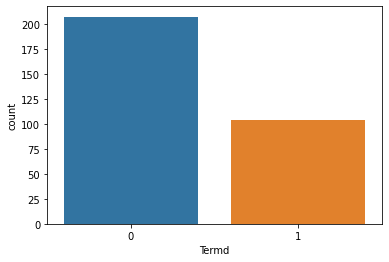

In [131]:
sns.countplot(x=data["Termd"])


In [132]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

In [133]:
ovs = RandomOverSampler(sampling_strategy='minority')
oversample = RandomOverSampler()
x_train, y_train = ovs.fit_resample(x_train, y_train)

In [134]:
y_train.shape

(326,)

In [135]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [136]:
x_train.head()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,age,tenure,PositionID,ManagerID,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,State_MA,State_ME,State_MT,State_NC,State_ND,State_NH,State_NV,State_NY,State_OH,State_OR,State_PA,State_RI,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website
0,-0.545692,1.128487,1.222022,-0.519538,-0.320937,0.986117,-0.806928,-0.566749,20,19.0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,-0.401402,-0.481826,-0.981160,-0.519538,-0.320937,0.986117,1.653411,0.375812,19,19.0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0
2,-0.530841,1.128487,0.120431,-0.519538,-0.320937,-0.040721,0.423242,-0.566749,19,22.0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1.460387,-0.456467,-0.981160,1.612076,-0.320937,-1.409839,-0.695094,-0.566749,8,4.0,1,1,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0
4,-0.000863,0.494506,1.222022,-0.519538,-0.320937,-1.409839,-1.589763,-1.038029,21,15.0,0,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [137]:
df2 = pd.concat([x_train,y_train], axis=1)

df2.head()

,Salary,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences,age,tenure,PositionID,ManagerID,MarriedID,MaritalStatusID,GenderID,DeptID,PerfScoreID,FromDiversityJobFairID,State_AZ,State_CA,State_CO,State_CT,State_FL,State_GA,State_ID,State_IN,State_KY,State_MA,State_ME,State_MT,State_NC,State_ND,State_NH,State_NV,State_NY,State_OH,State_OR,State_PA,State_RI,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,CitizenDesc_Non-Citizen,CitizenDesc_US Citizen,RaceDesc_Asian,RaceDesc_Black or African American,RaceDesc_Hispanic,RaceDesc_Two or more races,RaceDesc_White,RecruitmentSource_Diversity Job Fair,RecruitmentSource_Employee Referral,RecruitmentSource_Google Search,RecruitmentSource_Indeed,RecruitmentSource_LinkedIn,RecruitmentSource_On-line Web application,RecruitmentSource_Other,RecruitmentSource_Website,Termd
0,-0.545692,1.128487,1.222022,-0.519538,-0.320937,0.986117,-0.806928,-0.566749,20,19.0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.401402,-0.481826,-0.981160,-0.519538,-0.320937,0.986117,1.653411,0.375812,19,19.0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0
2,-0.530841,1.128487,0.120431,-0.519538,-0.320937,-0.040721,0.423242,-0.566749,19,22.0,0,0,0,5,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,1.460387,-0.456467,-0.981160,1.612076,-0.320937,-1.409839,-0.695094,-0.566749,8,4.0,1,1,0,3,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,-0.000863,0.494506,1.222022,-0.519538,-0.320937,-1.409839,-1.589763,-1.038029,21,15.0,0,0,0,6,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1


In [138]:
df2=df2.dropna()


In [139]:
x_train = df2.loc[:, ~df2.columns.isin(['Termd'])]

y_train = df2['Termd']

In [140]:
df3 = pd.concat([x_test,y_test], axis=1)

In [141]:
df3=df3.dropna()


In [142]:
x_test = df3.loc[:, ~df3.columns.isin(['Termd'])]

y_test = df3['Termd']

# Defining models i will use for predictions

In [143]:
models = {
    "   K-Nearest Neighbors": KNeighborsClassifier(),
    "   Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "         Decision Tree": DecisionTreeClassifier(),
    "        Neural Network": MLPClassifier(),
    "         Random Forest": RandomForestClassifier(n_estimators=500),
}

for name, model in models.items():
    model.fit(x_train, y_train)

# Checking Results

In [144]:
for name, model in models.items():
    print(name + " Accuracy: {:.2f}%".format(model.score(x_test, y_test) * 100))
    y_pred = model.predict(x_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

   K-Nearest Neighbors Accuracy: 74.19%
[[30 13]
 [ 3 16]]
              precision    recall  f1-score   support

           0       0.91      0.70      0.79        43
           1       0.55      0.84      0.67        19

    accuracy                           0.74        62
   macro avg       0.73      0.77      0.73        62
weighted avg       0.80      0.74      0.75        62

   Logistic Regression Accuracy: 70.97%
[[32 11]
 [ 7 12]]
              precision    recall  f1-score   support

           0       0.82      0.74      0.78        43
           1       0.52      0.63      0.57        19

    accuracy                           0.71        62
   macro avg       0.67      0.69      0.68        62
weighted avg       0.73      0.71      0.72        62

Support Vector Machine Accuracy: 50.00%
[[16 27]
 [ 4 15]]
              precision    recall  f1-score   support

           0       0.80      0.37      0.51        43
           1       0.36      0.79      0.49        19

    a

## Random Forest and Neural Network has the best performance with standard parameters

### Trying to see if Randomforest could behave better if i tune the parameters


In [145]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100], 
    'min_samples_split': [1,2,3], 
    'min_samples_leaf' : [1, 2,3],
    'max_features': ['sqrt','log2']
    }

RFC = RandomForestClassifier(random_state=100)

grid_search = GridSearchCV(RFC, param_grid, cv=5,return_train_score=True,n_jobs=-1, verbose = 50)
grid_search.fit(x_train,y_train)
grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 50}

In [146]:
from sklearn.model_selection import cross_val_score

RFC = RandomForestClassifier(random_state=300, max_features='sqrt', min_samples_leaf=1, min_samples_split=2, n_estimators=50)
cross_val_scores = cross_val_score(RFC, x_train, y_train, cv=10)
print(np.mean(cross_val_scores))

0.8872983870967742


In [147]:
RFC.fit(x_train, y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=50, random_state=300)

In [148]:
print(" Accuracy: {:.2f}%".format(RFC.score(x_test, y_test) * 100))
y_pred = RFC.predict(x_test)

 Accuracy: 80.65%


In [149]:
from sklearn.metrics import confusion_matrix


In [150]:
conmat = confusion_matrix(y_test, y_pred)


In [151]:
val = np.mat(conmat) 

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames, 

    )

print(df_cm)

    0   1
0  36   7
1   5  14


In [152]:
print((classification_report(y_test, y_pred)))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        43
           1       0.67      0.74      0.70        19

    accuracy                           0.81        62
   macro avg       0.77      0.79      0.78        62
weighted avg       0.81      0.81      0.81        62



# Getting Feature importances

### This helps understand the correlations between features and employee turnover. 

In [153]:
RFC.feature_importances_


array([9.30043422e-02, 6.91244693e-02, 3.40077001e-02, 1.95049770e-02,
       2.66774690e-02, 7.37300031e-02, 1.11688392e-01, 1.48406324e-01,
       5.20893474e-02, 6.94316360e-02, 1.68395200e-02, 3.18178059e-02,
       1.82307722e-02, 2.41800184e-02, 1.70172966e-02, 1.39374740e-02,
       4.23116185e-04, 2.41609467e-04, 2.15424259e-04, 1.37605133e-03,
       0.00000000e+00, 3.08651328e-04, 2.73086676e-04, 1.01472311e-04,
       0.00000000e+00, 4.94855149e-03, 0.00000000e+00, 0.00000000e+00,
       6.23704945e-04, 3.01572141e-04, 0.00000000e+00, 0.00000000e+00,
       2.44371316e-04, 5.41041988e-04, 1.82792310e-04, 6.42596936e-04,
       0.00000000e+00, 2.22512002e-03, 1.41760722e-03, 4.91478186e-04,
       0.00000000e+00, 2.78253750e-04, 0.00000000e+00, 1.06052743e-03,
       4.39011007e-03, 1.27757873e-02, 9.80871469e-03, 3.33551525e-04,
       3.47669293e-03, 1.34796675e-02, 9.42919216e-03, 1.12849833e-02,
       4.65859914e-02, 2.35734452e-02, 2.05859796e-02, 1.78310612e-03,
      

Text(0.5, 0, 'Random Forest Feature Importance')

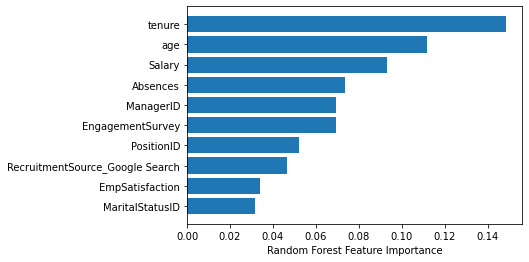

In [155]:
sorted_idx = RFC.feature_importances_.argsort()[-10:]
plt.barh(x.columns[sorted_idx], RFC.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

# Results

The dataset utilized in this project offers a foundation for carrying out a thorough comparison of several machine learning techniques. The results and discussion only cover how to use data mining techniques to understand employee turnover and being able to predict it rather than how to lower it.

The findings can be improved by having access to more data, working with other teams inside the comapny, having a better grasp of the context of the company, and optimizing the models that have been presented.

Numerous factors associated to employment, perks, and social standing can be found, although they are simply theories given that human behaviour is very complex. We cannot know for sure without conducting a more thorough investigation that takes into account the company's and the employees' wider surroundings.